In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install jovian
#!pip install wordcloud
#!pip install emoji
#!pip install seaborn

In [2]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

<IPython.core.display.Javascript object>

## Data Preprocessing
* Regex cheatsheet
    * https://www.rexegg.com/regex-quickstart.html
* Datetime format
    * http://strftime.org/

In [3]:
file = open('ML_Group_Project_Discuss.txt', encoding = 'utf-8')

In [4]:
x = file.read( )

In [5]:
x

'03/06/2019, 2:27 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.\n02/06/2019, 9:34 pm - Rakesh ML created group "ML Group Project Discuss🙏"\n03/06/2019, 2:26 pm - You joined using this group\'s invite link\n03/06/2019, 2:39 pm - +91 98717 63736 joined using this group\'s invite link\n03/06/2019, 3:06 pm - +91 85318 35994 joined using this group\'s invite link\n03/06/2019, 3:07 pm - +91 99922 18136 joined using this group\'s invite link\n03/06/2019, 3:41 pm - Rakesh ML: https://docs.google.com/spreadsheets/d/1fbf1umpcdzcgolwdlugjJp0DOwSOCxwRSqwVXTA_8D0/edit?usp=sharing\n03/06/2019, 3:42 pm - Rakesh ML: Please update details\n03/06/2019, 3:42 pm - Rakesh ML: We shall easily discuss\n03/06/2019, 3:43 pm - Rakesh ML: I have added new fields\n03/06/2019, 3:44 pm - +91 77089 20801: Ok\n03/06/2019, 5:20 pm - +91 80720 46551 joined using this group\'s invite link\n03/06/2019, 6:46 pm - +91 81061 58889 joined using this group\'s invite link\n03/06/201

In [6]:
type(x)

str

In [7]:
def rawToDf(file):
    with open(file, 'r', encoding = 'utf-8') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s', raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s', raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
   
    # converting date-time pattern which is of type String to type datetime, format is to be specified for the whole string where the placeholders are extracted by the method    
    try:
        df['date_time'] = pd.to_datetime(df['date_time'], format='%m/%d/%y, %I:%M %p - ') #10/20/19, 10:24 pm - 
    except:
        df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y, %I:%M %p - ') #20/10/2019, 10:24 pm -
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    # axis = 1 => Column, axis = 0 => Row
    
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

# Data

In [8]:
df = rawToDf('ML_Group_Project_Discuss.txt')

In [9]:
df.shape # no. of msgs

(660, 3)

In [10]:
df.head()

,date_time,user,msg
0,2019-06-03 14:27:00,grp_notif,Messages to this group are now secured with en...
1,2019-06-02 21:34:00,grp_notif,"Rakesh ML created group ""ML Group Project Disc..."
2,2019-06-03 14:26:00,grp_notif,You joined using this group's invite link
3,2019-06-03 14:39:00,grp_notif,+91 98717 63736 joined using this group's invi...
4,2019-06-03 15:06:00,grp_notif,+91 85318 35994 joined using this group's invi...


In [11]:
me = "Raja"

# No. of Images, group notifications and dropping them


In [12]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
images.shape

(2, 3)

In [13]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(37, 3)

In [14]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [15]:
df.reset_index(inplace=True, drop=True)
df.shape

(621, 3)

# Q 1)
## Who is the most active member of the group. Who is the least active. Is it same on weekday weekend?
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html


In [16]:
df.groupby("user")["msg"].count().sort_values(ascending=False)

user
Rakesh ML          267
+91 94810 71831     86
+91 88676 89114     44
+91 77089 20801     30
+91 86046 49926     25
+91 96035 94976     24
+91 99865 94131     21
+91 99240 26836     19
+91 94818 87872     16
+91 99922 18136     15
+91 94498 53590      8
+91 97908 47724      6
Raja                 6
+91 98865 93396      6
+91 91775 05888      4
+91 79778 47165      4
+91 81061 58889      4
+91 75062 48026      4
+91 99702 80429      4
+91 90514 97112      3
+91 76961 18524      3
+91 87926 87274      3
+91 84470 19222      2
+91 96114 37147      2
+91 80720 46551      2
+91 98425 75041      2
+91 92141 41488      2
+91 88006 47711      2
+91 85318 35994      1
+91 97187 67661      1
+91 98717 63736      1
+91 78377 71731      1
+91 77320 03331      1
+91 96362 87680      1
+91 91777 54864      1
Name: msg, dtype: int64

In [17]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 

In [18]:
df.weekday.value_counts(sort=True)

Monday       269
Tuesday      135
Wednesday     96
Sunday        47
Saturday      31
Friday        30
Thursday      13
Name: weekday, dtype: int64

In [19]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

# Q 2)
Count of all the emoticons that i have used till date.

In [20]:
df.head()

,date_time,user,msg,weekday,is_weekend
0,2019-06-03 15:41:00,Rakesh ML,https://docs.google.com/spreadsheets/d/1fbf1um...,Monday,False
1,2019-06-03 15:42:00,Rakesh ML,Please update details,Monday,False
2,2019-06-03 15:42:00,Rakesh ML,We shall easily discuss,Monday,False
3,2019-06-03 15:43:00,Rakesh ML,I have added new fields,Monday,False
4,2019-06-03 15:44:00,+91 77089 20801,Ok,Monday,False


In [21]:
df["user"].unique()

array(['Rakesh ML', '+91 77089 20801', '+91 99865 94131',
       '+91 94810 71831', '+91 87926 87274', '+91 86046 49926',
       '+91 81061 58889', '+91 99240 26836', '+91 98865 93396',
       '+91 94818 87872', '+91 75062 48026', '+91 84470 19222',
       '+91 76961 18524', '+91 79778 47165', '+91 88006 47711',
       '+91 97908 47724', '+91 80720 46551', '+91 99922 18136',
       '+91 96035 94976', '+91 94498 53590', 'Raja', '+91 96114 37147',
       '+91 85318 35994', '+91 91775 05888', '+91 98425 75041',
       '+91 88676 89114', '+91 98717 63736', '+91 91777 54864',
       '+91 92141 41488', '+91 90514 97112', '+91 99702 80429',
       '+91 77320 03331', '+91 96362 87680', '+91 97187 67661',
       '+91 78377 71731'], dtype=object)

In [22]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == me:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [23]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

✋ - 1


Q 3)
What can my activity say about my sleep cycle?

In [24]:
def to_hour(val):
    return val.hour

In [25]:
df['hour'] = df['date_time'].apply(to_hour)

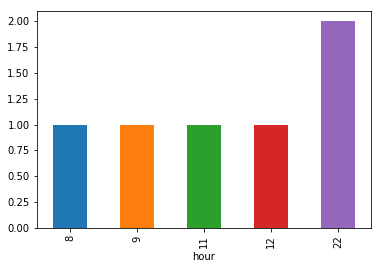

In [26]:
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

Q 4)
What is the difference in Weekend vs Weekday usage pattern?
How many words do I type on average on weekday vs weekend?

In [27]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

Rakesh ML          267
+91 94810 71831     86
+91 88676 89114     44
+91 77089 20801     30
+91 86046 49926     25
+91 96035 94976     24
+91 99865 94131     21
+91 99240 26836     19
+91 94818 87872     16
+91 99922 18136     15
+91 94498 53590      8
+91 97908 47724      6
+91 98865 93396      6
Raja                 6
+91 91775 05888      4
+91 81061 58889      4
+91 99702 80429      4
+91 75062 48026      4
+91 79778 47165      4
+91 76961 18524      3
+91 87926 87274      3
+91 90514 97112      3
+91 80720 46551      2
+91 96114 37147      2
+91 88006 47711      2
+91 98425 75041      2
+91 92141 41488      2
+91 84470 19222      2
+91 77320 03331      1
+91 85318 35994      1
+91 91777 54864      1
+91 97187 67661      1
+91 98717 63736      1
+91 96362 87680      1
+91 78377 71731      1
Name: user, dtype: int64

In [28]:
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['Rakesh ML',
 '+91 94810 71831',
 '+91 88676 89114',
 '+91 77089 20801',
 '+91 86046 49926']

In [29]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,msg,weekday,is_weekend,hour
0,2019-06-03 15:41:00,Rakesh ML,https://docs.google.com/spreadsheets/d/1fbf1um...,Monday,False,15
1,2019-06-03 15:42:00,Rakesh ML,Please update details,Monday,False,15
2,2019-06-03 15:42:00,Rakesh ML,We shall easily discuss,Monday,False,15
3,2019-06-03 15:43:00,Rakesh ML,I have added new fields,Monday,False,15
4,2019-06-03 15:44:00,+91 77089 20801,Ok,Monday,False,15


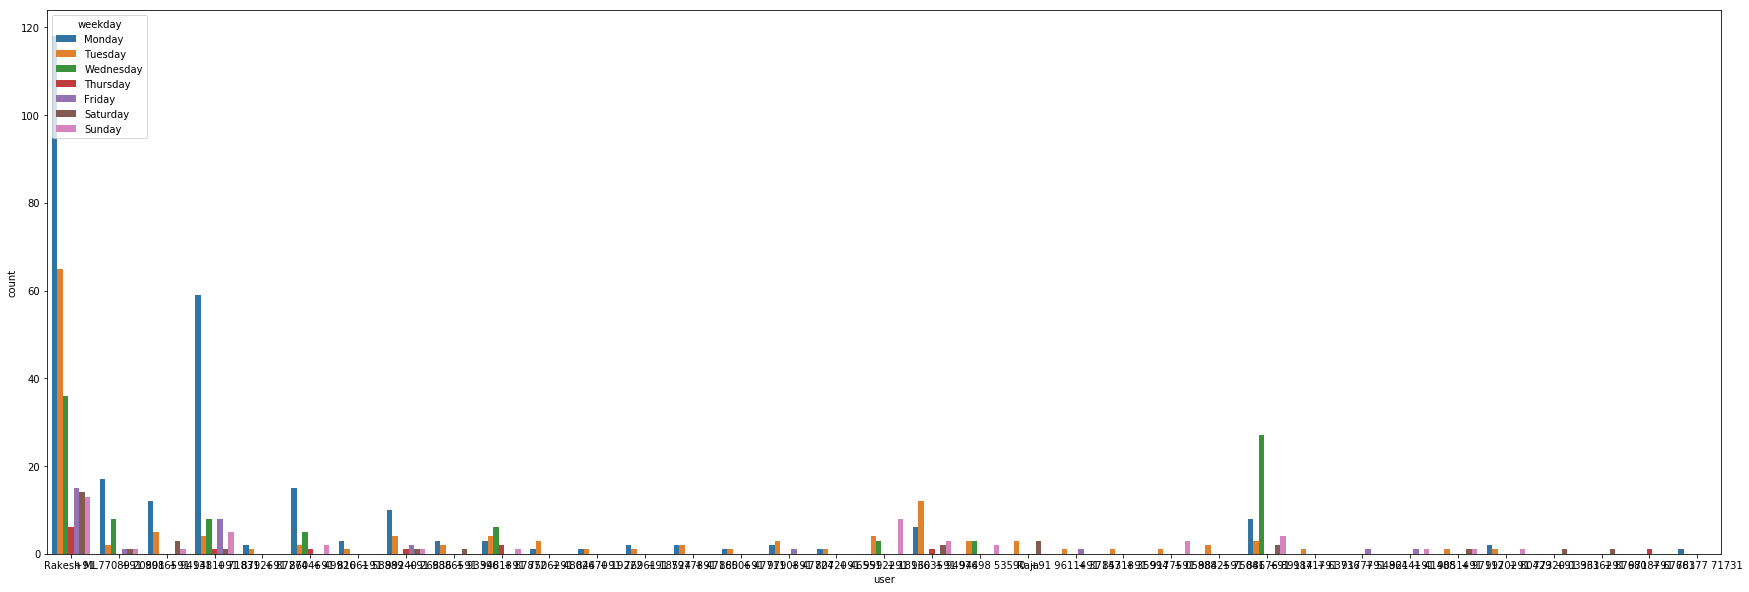

In [30]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="weekday", data=df)

In [31]:
df_top5['is_weekend'] = df_top5.weekday.isin(['Sunday', 'Saturday'])

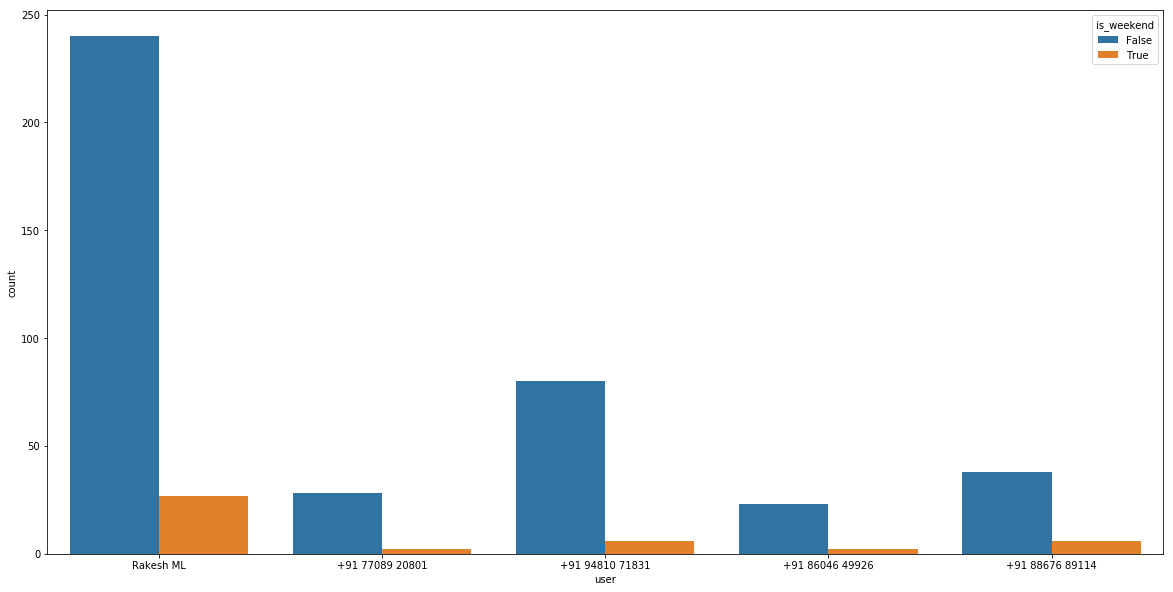

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top5)

In [33]:
def word_count(val):
    return len(val.split())

In [34]:
df['no_of_words'] = df['msg'].apply(word_count)

In [35]:
df_top5['no_of_words'] = df_top5['msg'].apply(word_count)

In [36]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

4782

In [37]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

697

In [38]:
total_words_weekday/5

956.4

In [39]:
total_words_weekend/2

348.5

In [40]:
df.groupby('user')['no_of_words'].sum().sort_values(ascending=False)

user
Rakesh ML          2414
+91 94810 71831     769
+91 88676 89114     385
+91 77089 20801     333
+91 96035 94976     260
+91 99922 18136     241
+91 86046 49926     218
+91 94818 87872     133
+91 99865 94131     121
+91 99240 26836     110
+91 99702 80429      97
+91 97908 47724      56
+91 79778 47165      51
+91 94498 53590      49
Raja                 37
+91 91775 05888      33
+91 81061 58889      27
+91 92141 41488      27
+91 88006 47711      19
+91 97187 67661      15
+91 96114 37147      15
+91 87926 87274      13
+91 90514 97112      11
+91 75062 48026       9
+91 91777 54864       8
+91 98717 63736       6
+91 98865 93396       6
+91 85318 35994       5
+91 84470 19222       3
+91 77320 03331       2
+91 76961 18524       2
+91 96362 87680       1
+91 98425 75041       1
+91 80720 46551       1
+91 78377 71731       1
Name: no_of_words, dtype: int64

In [41]:
(df.groupby('user')['no_of_words'].sum()/df.groupby('user').size()).sort_values(ascending=False)

user
+91 99702 80429    24.250000
+91 99922 18136    16.066667
+91 97187 67661    15.000000
+91 92141 41488    13.500000
+91 79778 47165    12.750000
+91 77089 20801    11.100000
+91 96035 94976    10.833333
+91 88006 47711     9.500000
+91 97908 47724     9.333333
Rakesh ML           9.041199
+91 94810 71831     8.941860
+91 88676 89114     8.750000
+91 86046 49926     8.720000
+91 94818 87872     8.312500
+91 91775 05888     8.250000
+91 91777 54864     8.000000
+91 96114 37147     7.500000
+91 81061 58889     6.750000
Raja                6.166667
+91 94498 53590     6.125000
+91 98717 63736     6.000000
+91 99240 26836     5.789474
+91 99865 94131     5.761905
+91 85318 35994     5.000000
+91 87926 87274     4.333333
+91 90514 97112     3.666667
+91 75062 48026     2.250000
+91 77320 03331     2.000000
+91 84470 19222     1.500000
+91 78377 71731     1.000000
+91 98865 93396     1.000000
+91 96362 87680     1.000000
+91 76961 18524     0.666667
+91 80720 46551     0.500000
+91 98425

In [42]:
(df_top5.groupby('user')['no_of_words'].sum()/df_top5.groupby('user').size()).sort_values(ascending=False)

user
+91 77089 20801    11.100000
Rakesh ML           9.041199
+91 94810 71831     8.941860
+91 88676 89114     8.750000
+91 86046 49926     8.720000
dtype: float64

In [43]:
wordPerMsg_weekday_vs_weekend = (df_top5.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df_top5.groupby(['user', 'is_weekend']).size())

wordPerMsg_weekday_vs_weekend

user             is_weekend
+91 77089 20801  False         11.178571
                 True          10.000000
+91 86046 49926  False          8.739130
                 True           8.500000
+91 88676 89114  False          8.736842
                 True           8.833333
+91 94810 71831  False          8.812500
                 True          10.666667
Rakesh ML        False          9.162500
                 True           7.962963
dtype: float64

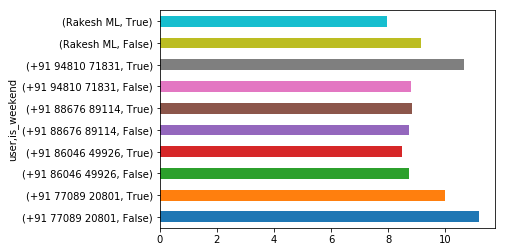

In [44]:
wordPerMsg_weekday_vs_weekend.plot(kind='barh')

Q 5)
Most Usage - Time of Day

In [45]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,1.0,NaN,NaN,3.0,2.0,36.0,4.0
1,NaN,30.0,NaN,NaN,NaN,2.0,NaN
2,NaN,2.0,NaN,NaN,2.0,2.0,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0


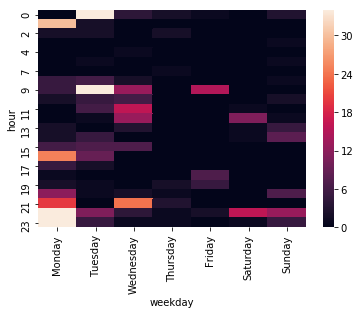

In [46]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

# Q 6)
In any group, do I have any inclination towards responding to someone?

In [47]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[168 188 214 585 587 613] (6,)


In [48]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[167 187 213 584 586 612] (6,)


In [49]:
prev_msgs_index = np.delete(prev_msgs_index, 0)
prev_msgs_index

array([187, 213, 584, 586, 612], dtype=int64)

In [50]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(5, 7)

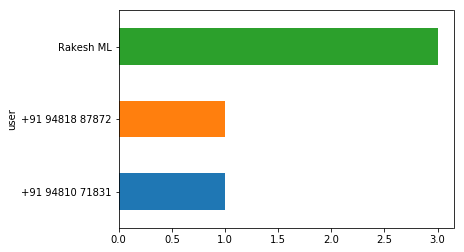

In [51]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')

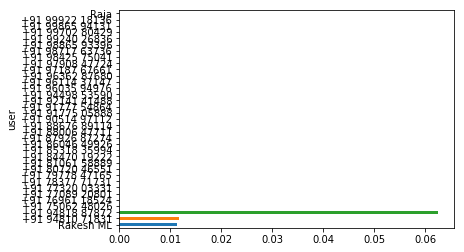

In [52]:
(df_replies.groupby(["user"])["msg"].size()/df.groupby(["user"])["msg"].size()).sort_values().plot(kind='barh')

# Q 7)
Which are the most common words?

In [53]:
# Most Common words

comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])

for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 

    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 

    for words in tokens: 
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 


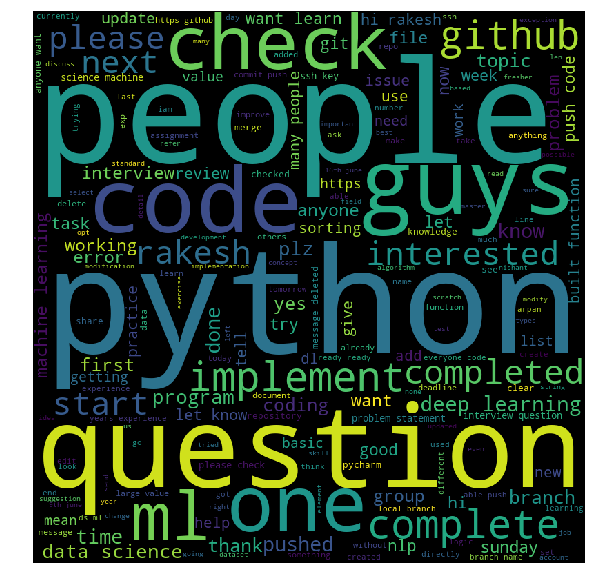

In [54]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

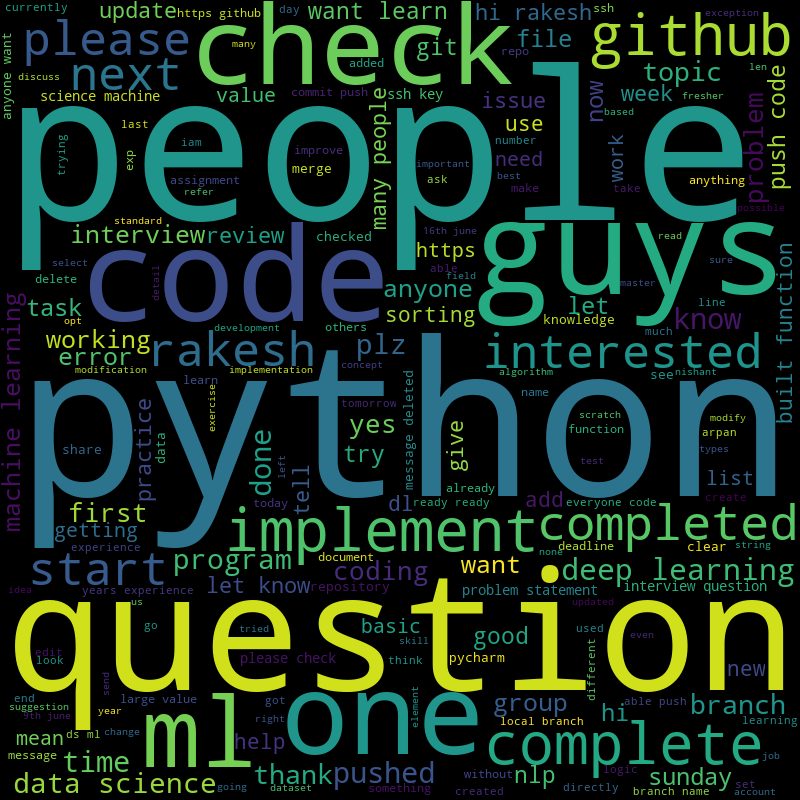

In [55]:
wordcloud.to_image()

### Know What They Know(atleast by little
* Let this meetup series encourage people to work on their own data:
    * Ask many questions on whatsapp chat data, commit to jovian with your answers/analysis visulization. Experiment!!!
* Explore more data resources here's a list i could find, share if you find any @ dsnet.org
    * WhatsApp
    * Google take out (https://takeout.google.com/)
        * Keyboard
        * Maps
        * Calendar
        * Chrome
        * Pay
        * etc....
    * https://www.cnet.com/how-to/how-to-download-all-your-instagram-data/
    * https://in.pcmag.com/software/120204/how-to-download-your-facebook-data-and-6-surprising-things-i-found
* Lets move step by step EDA first to try answer the questions on our own then move to some ML/DL Models
## Assingment-kind
* 1way ya 2way, check for a response time between two people